Max transfer time for env S2_C2_N50 :     238.234301
Average transfer time for env S2_C2_N50 : 113.02997377419355
Min transfer time for env S2_C2_N50 :     76.467803


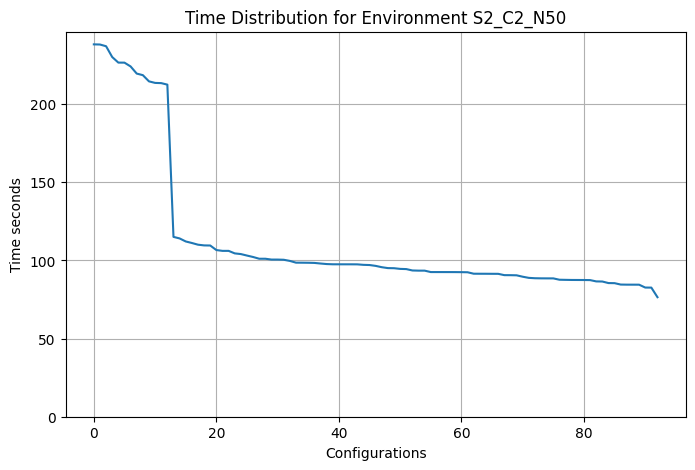

Max transfer time for env S2_C8_N50 :     241.113713
Average transfer time for env S2_C8_N50 : 114.19517337894737
Min transfer time for env S2_C8_N50 :     78.472798


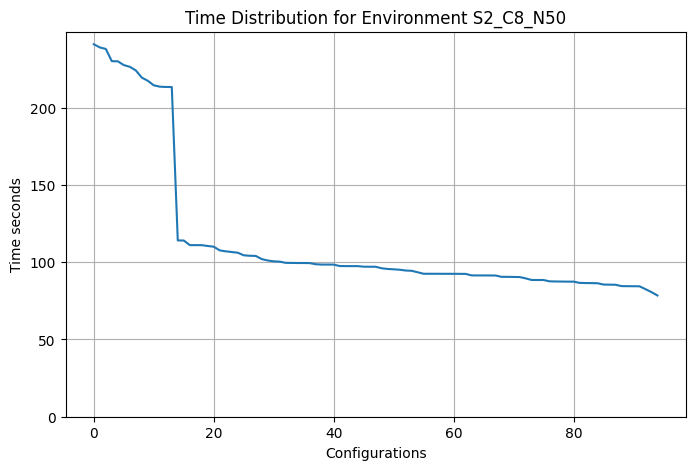

Max transfer time for env S4_C16_N50 :     231.181315
Average transfer time for env S4_C16_N50 : 109.67746389361702
Min transfer time for env S4_C16_N50 :     68.473674


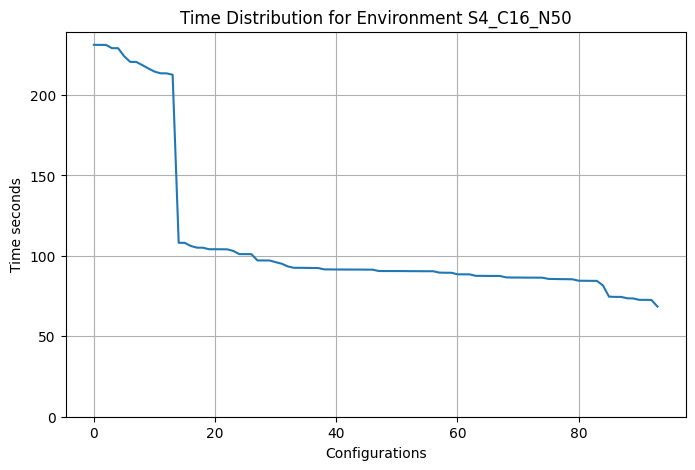

Max transfer time for env S8_C8_N50 :     230.17788
Average transfer time for env S8_C8_N50 : 107.87928898924731
Min transfer time for env S8_C8_N50 :     67.448326


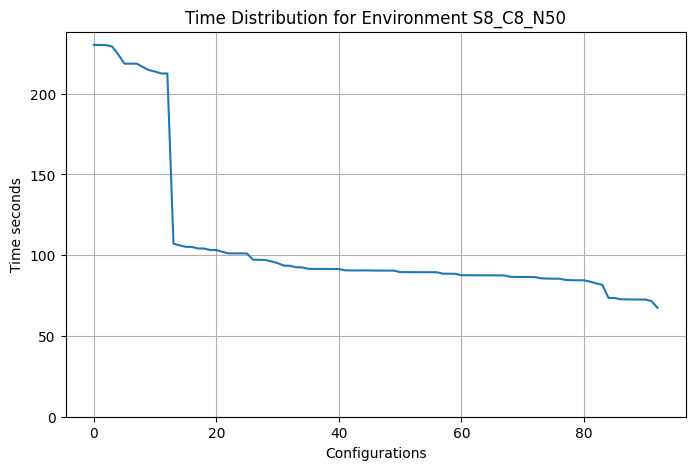

Max transfer time for env S8_C2_N50 :     231.193604
Average transfer time for env S8_C2_N50 : 107.6265665376344
Min transfer time for env S8_C2_N50 :     68.478226


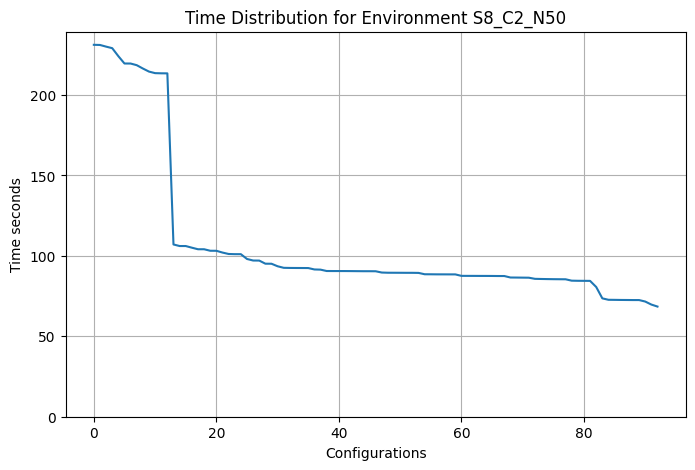

Max transfer time for env S16_C4_N50 :     231.148686
Average transfer time for env S16_C4_N50 : 106.63784841111111
Min transfer time for env S16_C4_N50 :     68.465487


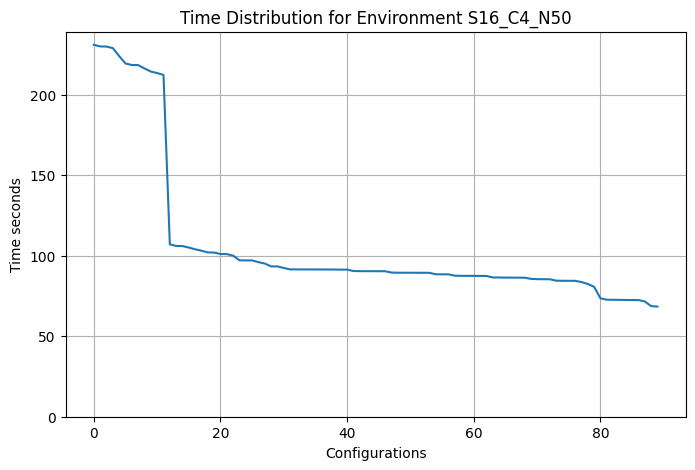

Max transfer time for env S16_C16_N50 :     231.066605
Average transfer time for env S16_C16_N50 : 109.78505207228916
Min transfer time for env S16_C16_N50 :     67.460177


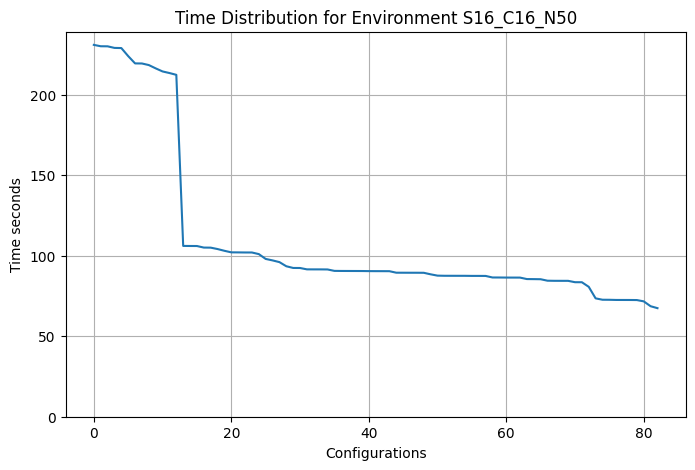

Max transfer time for env S16_C8_N50 :     232.081989
Average transfer time for env S16_C8_N50 : 110.42286814634146
Min transfer time for env S16_C8_N50 :     68.477941


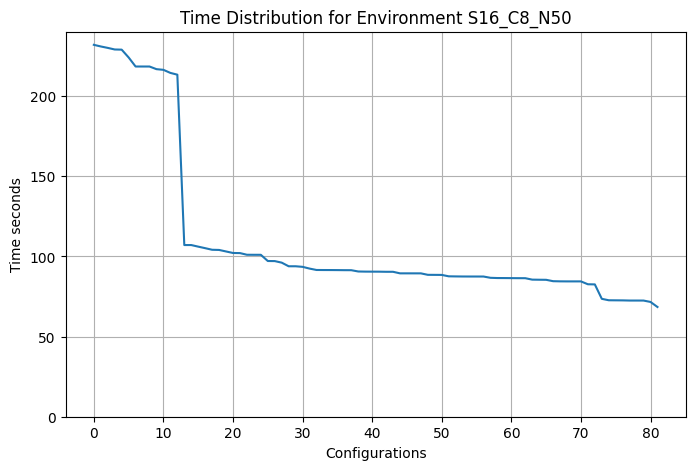

Max transfer time for env S2_C2_N150 :     111.54277
Average transfer time for env S2_C2_N150 : 79.58986311494253
Min transfer time for env S2_C2_N150 :     50.459156


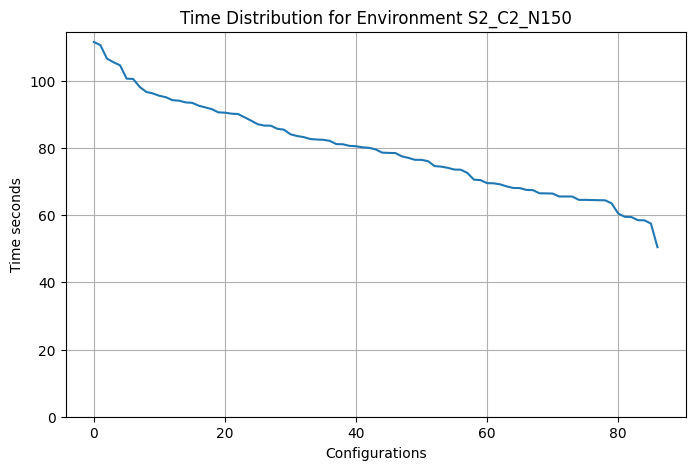

Max transfer time for env S2_C8_N150 :     110.602881
Average transfer time for env S2_C8_N150 : 79.34163609411765
Min transfer time for env S2_C8_N150 :     51.445857


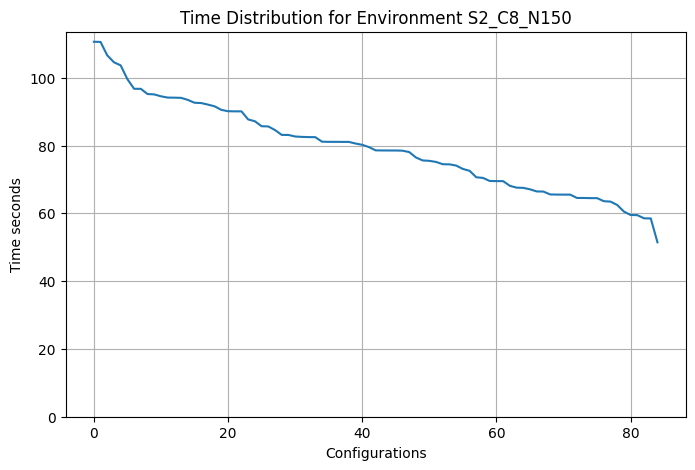

Max transfer time for env S4_C16_N150 :     89.062069
Average transfer time for env S4_C16_N150 : 54.463396162790694
Min transfer time for env S4_C16_N150 :     32.473526


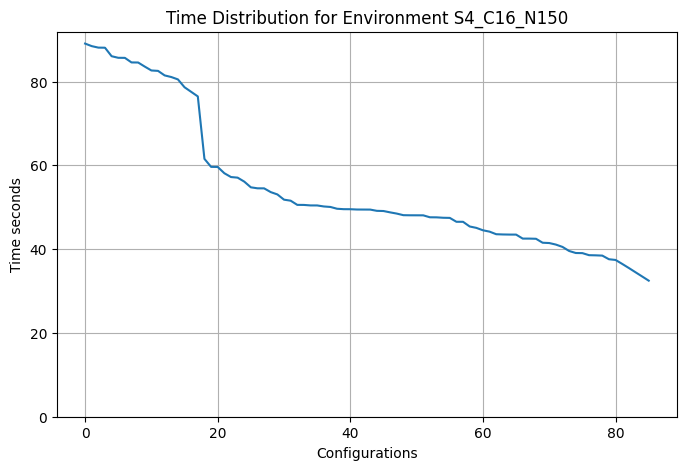

Max transfer time for env S8_C8_N150 :     88.12941
Average transfer time for env S8_C8_N150 : 52.05758830120482
Min transfer time for env S8_C8_N150 :     28.680814


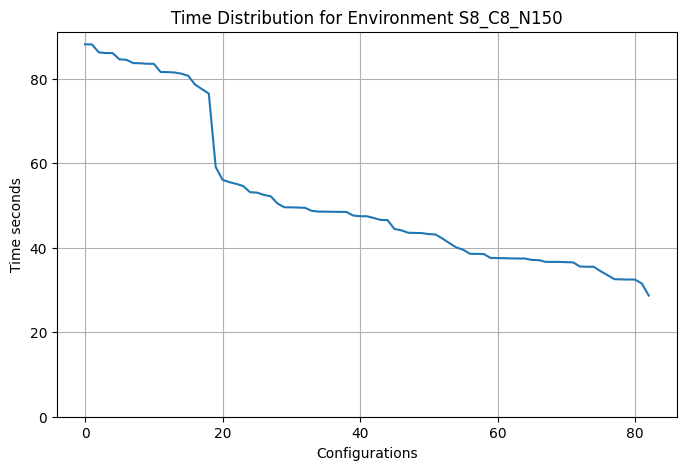

Max transfer time for env S8_C2_N150 :     88.055253
Average transfer time for env S8_C2_N150 : 52.21264389873418
Min transfer time for env S8_C2_N150 :     32.460959


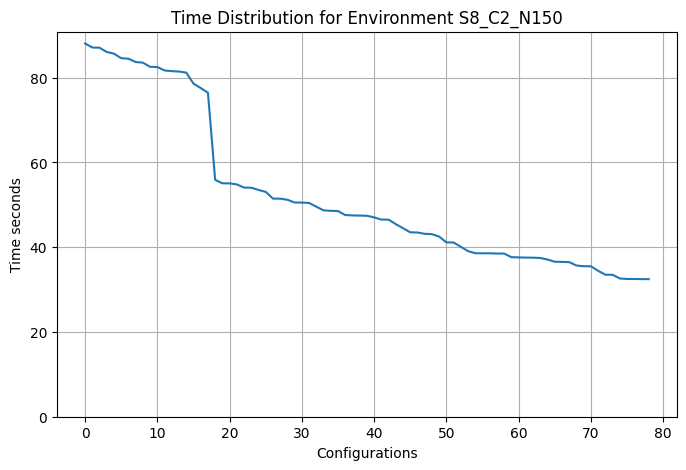

Max transfer time for env S16_C4_N150 :     87.102436
Average transfer time for env S16_C4_N150 : 51.49671577108434
Min transfer time for env S16_C4_N150 :     28.668132


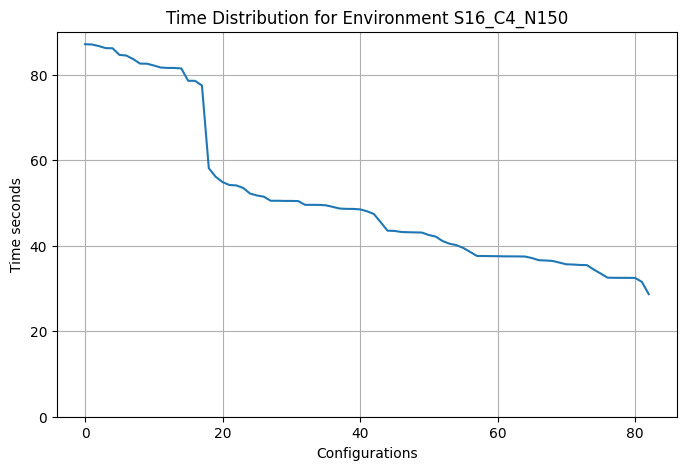

Max transfer time for env S16_C16_N150 :     88.145012
Average transfer time for env S16_C16_N150 : 52.11588498795181
Min transfer time for env S16_C16_N150 :     28.636195


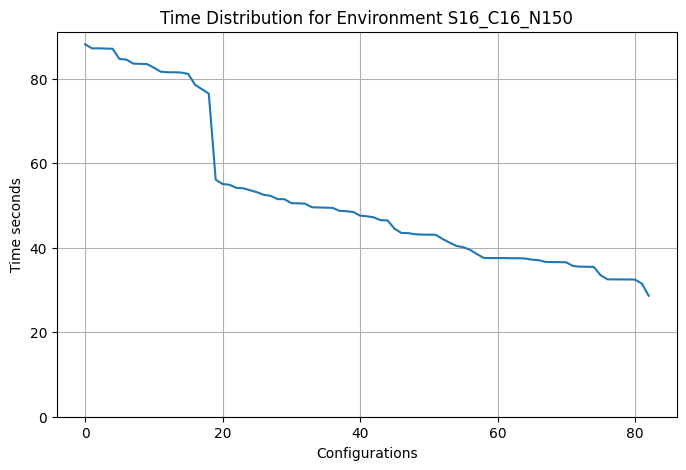

Max transfer time for env S16_C8_N150 :     88.172213
Average transfer time for env S16_C8_N150 : 51.8256471547619
Min transfer time for env S16_C8_N150 :     29.644251


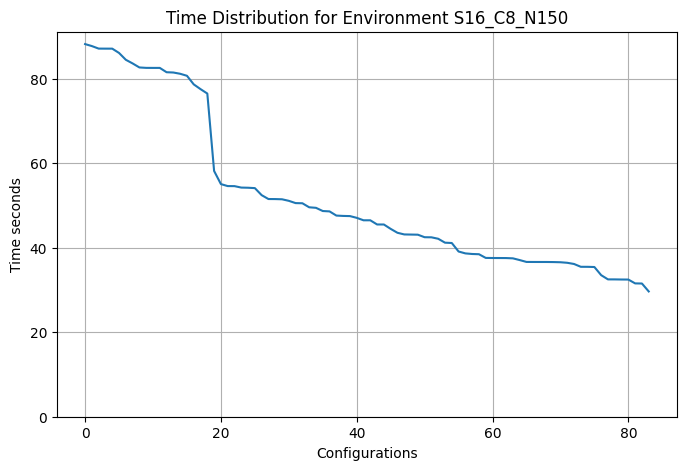

Max transfer time for env S2_C2_N1000 :     109.506802
Average transfer time for env S2_C2_N1000 : 75.60738632183909
Min transfer time for env S2_C2_N1000 :     46.43403


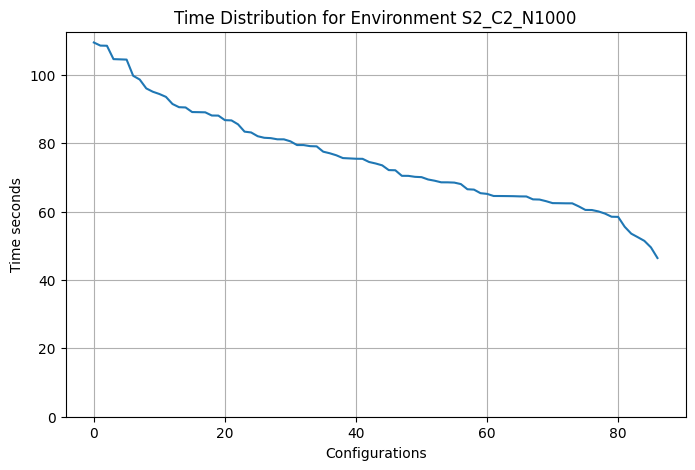

Max transfer time for env S2_C8_N1000 :     110.605449
Average transfer time for env S2_C8_N1000 : 75.7542586627907
Min transfer time for env S2_C8_N1000 :     46.455196


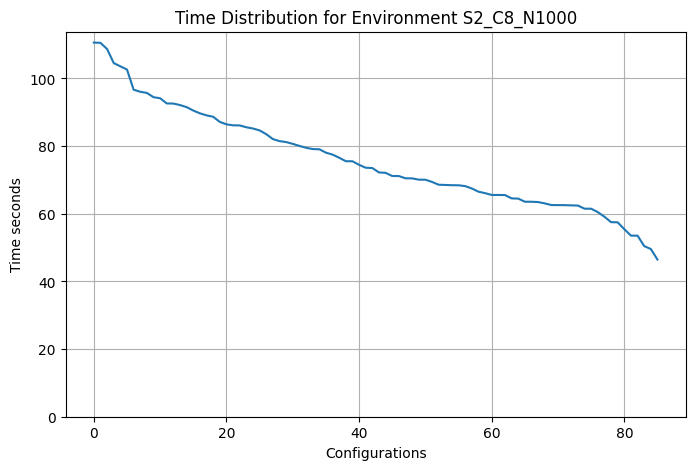

Max transfer time for env S4_C16_N1000 :     85.69197
Average transfer time for env S4_C16_N1000 : 48.53431762790698
Min transfer time for env S4_C16_N1000 :     31.430289


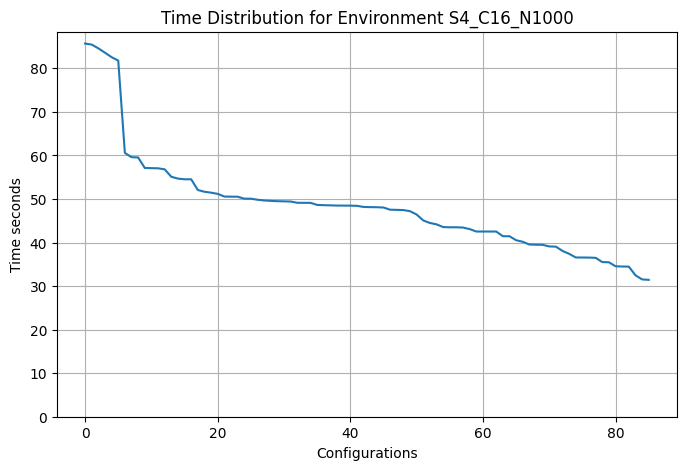

Max transfer time for env S8_C8_N1000 :     84.432389
Average transfer time for env S8_C8_N1000 : 42.29844942105263
Min transfer time for env S8_C8_N1000 :     20.514481


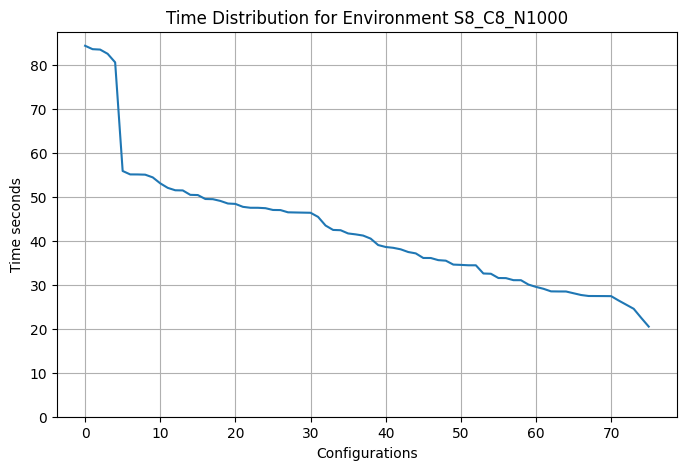

Max transfer time for env S8_C2_N1000 :     85.683416
Average transfer time for env S8_C2_N1000 : 43.9553074375
Min transfer time for env S8_C2_N1000 :     22.499785


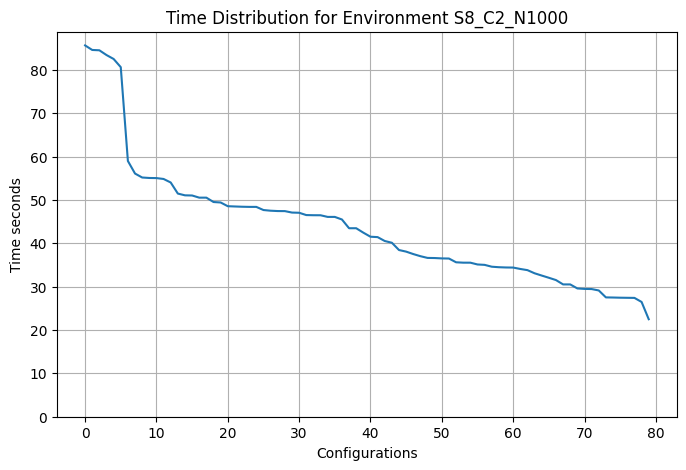

Max transfer time for env S16_C8_N1000 :     85.686585
Average transfer time for env S16_C8_N1000 : 42.36350253571428
Min transfer time for env S16_C8_N1000 :     20.492702


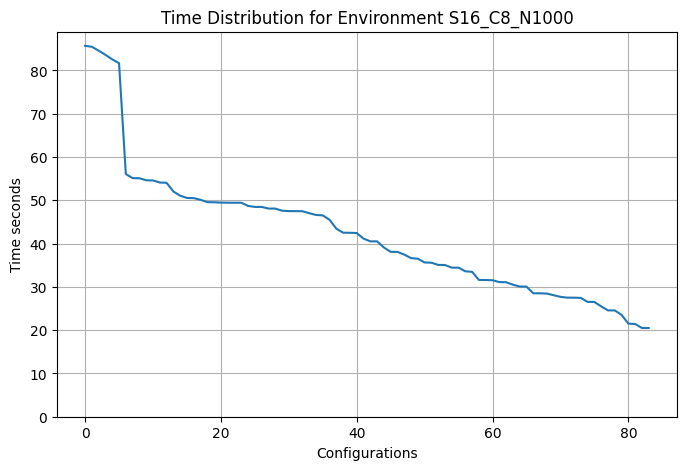

Max transfer time for env S16_C4_N1000 :     85.641651
Average transfer time for env S16_C4_N1000 : 42.181971729411764
Min transfer time for env S16_C4_N1000 :     20.484206


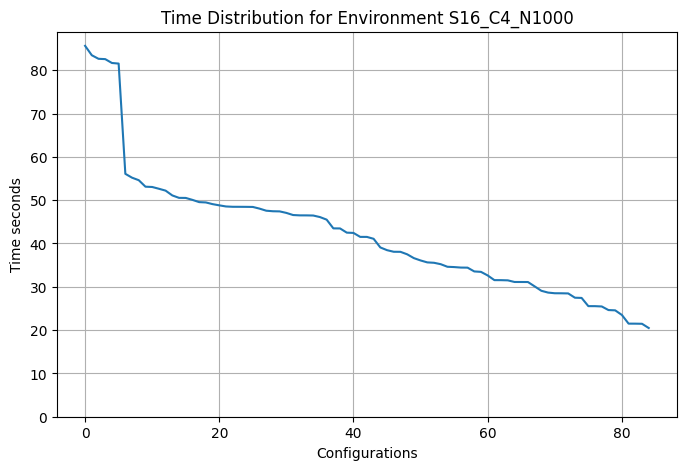

Max transfer time for env S16_C16_N1000 :     84.693408
Average transfer time for env S16_C16_N1000 : 42.447739416666664
Min transfer time for env S16_C16_N1000 :     20.475619


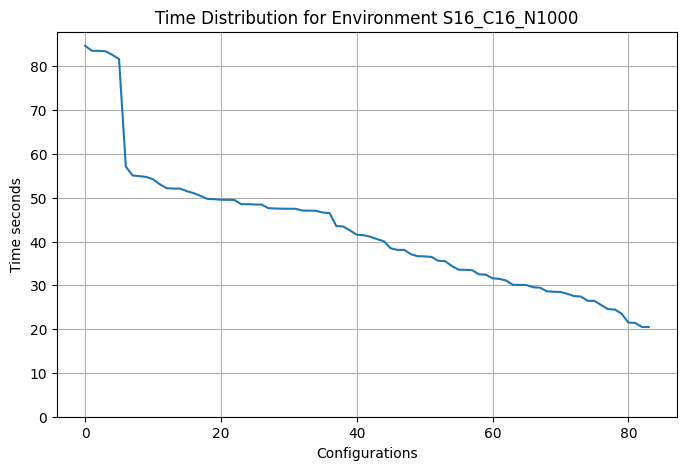

In [31]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

def get_file_list(base_path, signatures):
    """Generate file lists for the given base path and environment signatures."""
    return [glob.glob(f"{base_path}/{signature}_random_sample*.csv") for signature in signatures]

def load_and_filter_data(file_list, max_config_id, time_threshold=2):
    """Load and filter data based on time and config_id."""
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        df = df[(df['time'] > time_threshold) & (df['config_id'] < max_config_id)]
        data_frames.append(df)
    return pd.concat(data_frames, axis=0, ignore_index=True) if data_frames else pd.DataFrame()

BASE_PATH = "C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k"


ENV_SIGNATURES_ALL = [
#orignal 9 environments
"S16_C16_N1000","S16_C8_N100","S8_C1_N50","S16_C16_N10000","S16_C4_N10","S8_C8_N500","S2_C2_N20","S16_C1_N1000","S16_C1_N10",
    
# additional 32 new environments
            "S2_C2_N100","S2_C2_N500","S2_C2_N1000",
"S2_C8_N20","S2_C8_N100","S2_C8_N500","S2_C8_N1000",
"S2_C16_N20","S2_C16_N100","S2_C16_N500","S2_C16_N1000",
"S8_C2_N20","S8_C2_N100","S8_C2_N500","S8_C2_N1000",
"S8_C8_N20","S8_C8_N100",             "S8_C8_N1000",
"S8_C16_N20","S8_C16_N100","S8_C16_N500","S8_C16_N1000",
"S16_C2_N20","S16_C2_N100","S16_C2_N500","S16_C2_N1000",
"S16_C8_N20",              "S16_C8_N500","S16_C8_N1000",
"S16_C16_N20","S16_C16_N100","S16_C16_N500"
]


# only 16-16, and scale network
ENV_SIGNATURES_SCALE_NETWORK = [
"S16_C16_N20",
"S16_C16_N50",
"S16_C16_N100",
"S16_C16_N200",
    
"S16_C16_N300",
"S16_C16_N400",
"S16_C16_N500",
"S16_C16_N600",
    
"S16_C16_N700",
"S16_C16_N800",
"S16_C16_N900",
"S16_C16_N1000",
    
#"S16_C16_N10000"
]



# only network 1000, and scale server/client cpu
ENV_SIGNATURES_SCALE_COMPUTE = [
"S2_C2_N1000",
"S2_C4_N1000",
"S2_C8_N1000",
"S2_C16_N1000",

"S4_C2_N1000",
"S4_C4_N1000",
"S4_C8_N1000",
"S4_C16_N1000",


"S8_C2_N1000",
"S8_C4_N1000",
"S8_C8_N1000",
"S8_C16_N1000",


#"S16_C1_N1000",
"S16_C2_N1000",
"S16_C4_N1000",
"S16_C8_N1000",
"S16_C16_N1000",
]

ENV_SIGNATURES_NEW_BASE_ENVS = [
    "S2_C2_N50","S2_C8_N50",
    "S4_C16_N50",
    "S8_C8_N50","S8_C2_N50",
    "S16_C4_N50","S16_C16_N50", "S16_C8_N50",
    "S2_C2_N150","S2_C8_N150",
    "S4_C16_N150",
    "S8_C8_N150","S8_C2_N150",
    "S16_C4_N150","S16_C16_N150", "S16_C8_N150",
    "S2_C2_N1000","S2_C8_N1000",
    "S4_C16_N1000",
    "S8_C8_N1000","S8_C2_N1000", "S16_C8_N1000",
    "S16_C4_N1000","S16_C16_N1000"
]


env_lists = {
    #"SCALE_COMPUTE": ENV_SIGNATURES_SCALE_COMPUTE,
    #"SCALE_NETWORK": ENV_SIGNATURES_SCALE_NETWORK,
    "NEW_BASE":ENV_SIGNATURES_NEW_BASE_ENVS,
    #"ALL_ORIG": ENV_SIGNATURES_ALL,
    #"TRUE_ALL": list(set(ENV_SIGNATURES_SCALE_NETWORK).union(ENV_SIGNATURES_SCALE_COMPUTE, ENV_SIGNATURES_ALL))
    #"SCALE_BOTH": list(set(ENV_SIGNATURES_SCALE_NETWORK).union(ENV_SIGNATURES_SCALE_COMPUTE))
}

for name, env_list in env_lists.items():
    
    file_lists = get_file_list(BASE_PATH, env_list)
    df_heatmap = pd.DataFrame(0, index=env_list, columns=env_list, dtype=float)
    
    N = 66
    for i, file_list in enumerate(file_lists):

        env = ""
        algo = ""
    
        all_data = pd.DataFrame()
        list_single_dfs_1310k = []
    
        for file in file_list:
    
            env = file.split("/")[-1].split("\\")[1].split("_random")[0]
            algo = file.split("\\")[-2]
    
            df = pd.read_csv(file)
            df = df[df['time'] > 2]
    
            df = df[df['config_id'] < 500]
    
            list_single_dfs_1310k.append(df)
            
        all_data = pd.concat(list_single_dfs_1310k, axis=0, ignore_index=True)
    
        all_data = all_data.sort_values(by='time',ascending=False).reset_index()
        
        
        print(f"Max transfer time for env {env} :     {all_data['time'].max()}")
        print(f"Average transfer time for env {env} : {statistics.mean(all_data['time'])}")
        print(f"Min transfer time for env {env} :     {all_data['time'].min()}")
        
        plt.figure(figsize=(8, 5))
        
        plt.plot(all_data['time'])
        plt.grid()
        plt.xlabel('Configurations')
        plt.ylabel('Time seconds')
        plt.ylim(bottom=0)
        plt.title(f"Time Distribution for Environment {env}")# and Algorithm {algo}")
        plt.show()